### Library 

In [161]:
import sys
import os
import datetime
import pandas as pd
import numpy as np
import pickle
from matplotlib import pyplot as plt

path_main_folder = '/home/antorosi/Documents/AutoEncoder'
sys.path.append(path_main_folder)

from CVAE.cvae import compile_cvae, run_cvae
from CVAE.cvae_model import CVAE
from conso.load_shape_data import *  
from conso.conso_helpers import plot_latent_space_projection, pyplot_latent_space_projection_temp

### Load and shape data 

In [162]:
# Load raw data
path_data = os.path.join(path_main_folder, 'data')
dict_data_conso = load_data_conso(path_data)

In [163]:
# Load Holiday day information
holiday_days_csv = os.path.join(path_data, "joursFeries.csv")
holiday_days_df = pd.read_csv(holiday_days_csv, sep=";")
holiday_days_df.ds = pd.to_datetime(holiday_days_df.ds)
holiday_days_df['is_hd'] = 1

In [164]:
# Unifomization
data_conso_df, dict_colnames_conso = get_uniformed_data_conso(dict_data_conso)

In [165]:
# Change ganularity ?
name_granu = '15m'
data_conso_df = change_granularity(data_conso_df, granularity="15min")

In [166]:
# Get x_conso dataframe for autoencoder purpose
x_conso = get_x_conso_autoencoder(data_conso_df, dict_colnames_conso)

### Build dataset 

In [167]:
# Split train and test
#date_test_start = datetime.date(2014,1,1)
#date_test_end = x_conso.ds.max()
#dict_xconso = get_train_test_x_conso(x_conso, date_test_start, date_test_end)

dict_xconso = {'train': x_conso}

In [168]:
# Normalize x_conso
type_scaler = 'standard'
dict_xconso = normalize_xconso(dict_xconso, dict_colnames_conso, type_scaler = 'standard')

In [169]:
name_type_cond = 'm-wd'
name_train = '0' # 1: first period ; 0 all periods
name_type_x = 'c'
type_x = ['conso']
type_cond = ['month', 'weekday']

In [170]:
dataset = get_dataset_autoencoder(dict_xconso=dict_xconso, type_x=type_x, type_cond=type_cond)

In [171]:
dataset['train']['x'][0].shape

(1830, 96)

### Build model

In [172]:
path_out = os.path.join(path_main_folder, 'out')

In [173]:
name_model = 'cvae_conso_e48-24-12_d12-24-48_z2_gran-{}_x-{}_cond-{}'.format(name_granu, name_type_x, name_type_cond)

In [174]:
name_model

'cvae_conso_e48-24-12_d12-24-48_z2_gran-15m_x-c_cond-m-wd'

In [175]:
# Parameters
cond_dim = dataset['train']['x'][1].shape[1]
e_dims=[48,24,12]
d_dims=[12,24,48]
z_dim=2
beta = 0.2

In [176]:
model = CVAE(cond_dim=cond_dim, 
             e_dims=e_dims, 
             d_dims=d_dims, 
             z_dim=z_dim, 
             beta=beta,
             name=name_model, 
             output=path_out)

complete model: 
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
x_true (InputLayer)             (None, 96)           0                                            
__________________________________________________________________________________________________
cond (InputLayer)               (None, 14)           0                                            
__________________________________________________________________________________________________
encoder (Model)                 [(None, 2), (None, 2 6856        x_true[0][0]                     
                                                                 cond[0][0]                       
__________________________________________________________________________________________________
sample_z (Lambda)               (None, 2)            0           encoder[1][0]              

### Trainning model 



--- START TRAINING ---

Epoch 1/200
1830/1830 [==============================] - 1s 355us/step - loss: 33.2845 - kl_loss: 26.7992 - recon_loss: 27.9246
Epoch 2/200
1830/1830 [==============================] - 0s 73us/step - loss: 7.3720 - kl_loss: 10.2857 - recon_loss: 5.3149
Epoch 3/200
1830/1830 [==============================] - 0s 87us/step - loss: 5.3480 - kl_loss: 7.8312 - recon_loss: 3.7817
Epoch 4/200
1830/1830 [==============================] - 0s 91us/step - loss: 4.5061 - kl_loss: 7.0828 - recon_loss: 3.0895
Epoch 5/200
1830/1830 [==============================] - 0s 92us/step - loss: 4.0220 - kl_loss: 6.2192 - recon_loss: 2.7781
Epoch 6/200
1830/1830 [==============================] - 0s 88us/step - loss: 3.6444 - kl_loss: 5.7627 - recon_loss: 2.4918
Epoch 7/200
1830/1830 [==============================] - 0s 76us/step - loss: 3.3682 - kl_loss: 5.3343 - recon_loss: 2.3014
Epoch 8/200
1830/1830 [==============================] - 0s 74us/step - loss: 3.2337 - kl_loss: 5.082

1830/1830 [==============================] - 0s 77us/step - loss: 1.7008 - kl_loss: 4.0063 - recon_loss: 0.8995
Epoch 67/200
1830/1830 [==============================] - 0s 73us/step - loss: 1.7244 - kl_loss: 3.9684 - recon_loss: 0.9308
Epoch 68/200
1830/1830 [==============================] - 0s 73us/step - loss: 1.6632 - kl_loss: 3.9304 - recon_loss: 0.8771
Epoch 69/200
1830/1830 [==============================] - 0s 74us/step - loss: 1.6712 - kl_loss: 3.8800 - recon_loss: 0.8952
Epoch 70/200
1830/1830 [==============================] - 0s 79us/step - loss: 1.6623 - kl_loss: 3.8970 - recon_loss: 0.8829
Epoch 71/200
1830/1830 [==============================] - 0s 75us/step - loss: 1.6452 - kl_loss: 3.8881 - recon_loss: 0.8675
Epoch 72/200
1830/1830 [==============================] - 0s 82us/step - loss: 1.6755 - kl_loss: 3.8693 - recon_loss: 0.9017
Epoch 73/200
1830/1830 [==============================] - 0s 81us/step - loss: 1.6244 - kl_loss: 3.8608 - recon_loss: 0.8522
Epoch 74/200


1830/1830 [==============================] - 0s 67us/step - loss: 1.4856 - kl_loss: 3.5327 - recon_loss: 0.7791
Epoch 132/200
1830/1830 [==============================] - 0s 68us/step - loss: 1.4678 - kl_loss: 3.5366 - recon_loss: 0.7605
Epoch 133/200
1830/1830 [==============================] - 0s 74us/step - loss: 1.4979 - kl_loss: 3.5997 - recon_loss: 0.7780
Epoch 134/200
1830/1830 [==============================] - 0s 72us/step - loss: 1.4628 - kl_loss: 3.5050 - recon_loss: 0.7618
Epoch 135/200
1830/1830 [==============================] - 0s 70us/step - loss: 1.4525 - kl_loss: 3.4646 - recon_loss: 0.7596
Epoch 136/200
1830/1830 [==============================] - 0s 73us/step - loss: 1.4653 - kl_loss: 3.4722 - recon_loss: 0.7709
Epoch 137/200
1830/1830 [==============================] - 0s 67us/step - loss: 1.4660 - kl_loss: 3.5177 - recon_loss: 0.7624
Epoch 138/200
1830/1830 [==============================] - 0s 72us/step - loss: 1.4587 - kl_loss: 3.4802 - recon_loss: 0.7626
Epoch 

1830/1830 [==============================] - 0s 71us/step - loss: 1.3621 - kl_loss: 3.2956 - recon_loss: 0.7029
Epoch 197/200
1830/1830 [==============================] - 0s 73us/step - loss: 1.3799 - kl_loss: 3.3154 - recon_loss: 0.7169
Epoch 198/200
1830/1830 [==============================] - 0s 71us/step - loss: 1.3576 - kl_loss: 3.2566 - recon_loss: 0.7063
Epoch 199/200
1830/1830 [==============================] - 0s 73us/step - loss: 1.3574 - kl_loss: 3.2520 - recon_loss: 0.7070
Epoch 200/200
1830/1830 [==============================] - 0s 72us/step - loss: 1.3773 - kl_loss: 3.2814 - recon_loss: 0.7210


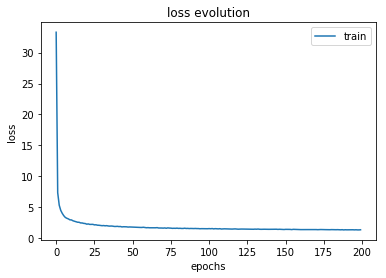

In [177]:
model.main_train(dataset, training_epochs=200, batch_size=20, verbose=True)

### Loading model 

In [178]:
#model.load_model(os.path.join(path_out, name_model, 'models'))

### Analysis of the results

In [179]:
name_set_plot = 'train'
version = '-v4'

In [180]:
x_encoded = model.encoder.predict(dataset[name_set_plot]['x'])[0]

In [181]:
calendar_info = pd.DataFrame(dataset[name_set_plot]['ds'])
calendar_info['month'] = calendar_info.ds.dt.month
calendar_info['weekday'] = calendar_info.ds.dt.weekday
calendar_info['is_weekday'] = (calendar_info.weekday < 5).apply(lambda x:int(x))
calendar_info = pd.merge(calendar_info, holiday_days_df[['ds', 'is_hd']], on='ds', how ='left')
calendar_info.loc[calendar_info['is_hd'].isna(),'is_hd'] = 0

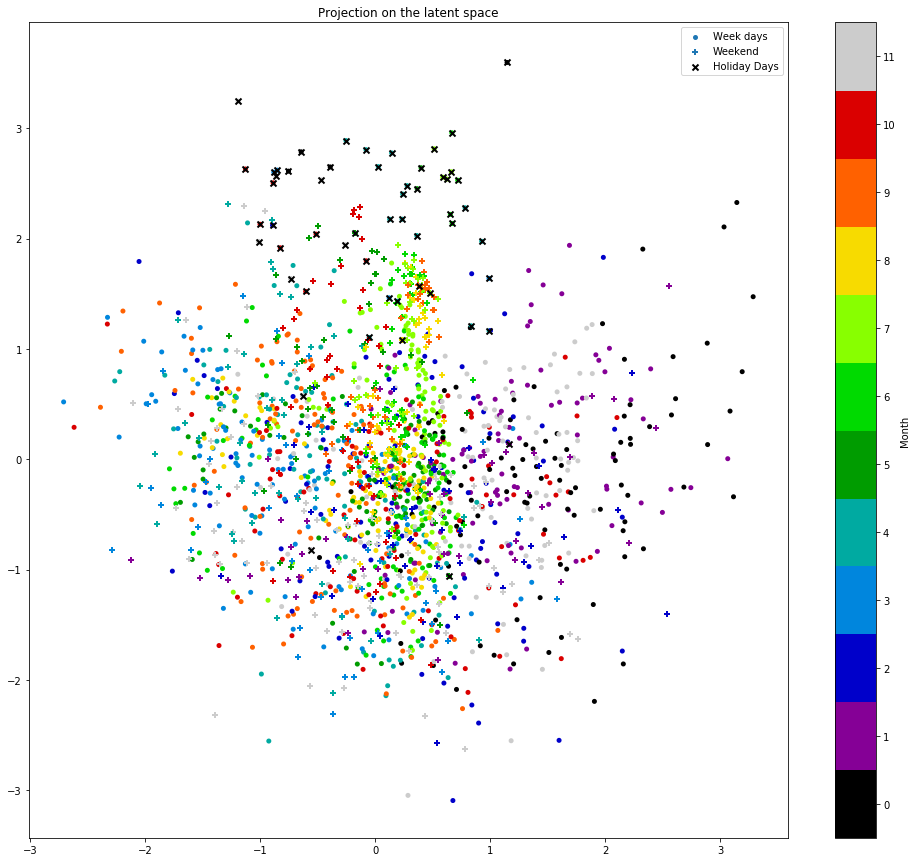

In [182]:
name_plot = 'z2_beta-{}_train-{}_set-{}_cond-{}{}'.format(str(beta), name_train, name_set_plot,str(name_type_cond),version)
plot_latent_space_projection(x_proj=x_encoded, calendar_info=calendar_info,
                             path_folder_out=os.path.join(path_out,name_model,'results'), name=name_plot, 
                             pyplot=True, plotly = False)

In [183]:
temp = get_cond_autoencoder(dataset['train']['ds'], type_cond=['temp'], data_conso_df=data_conso_df)
temp = temp.flatten()

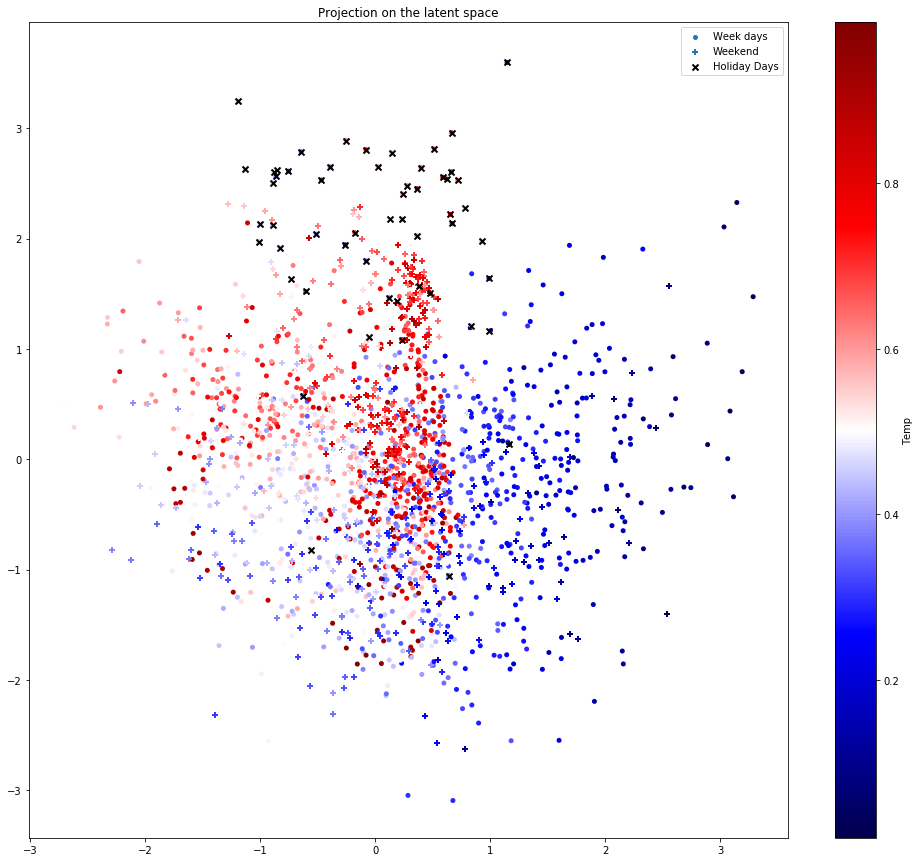

In [184]:
name_plot = 'temp_z2_beta-{}_train-{}_set-{}_cond-{}{}'.format(str(beta), name_train, name_set_plot,str(name_type_cond),version)
pyplot_latent_space_projection_temp(x_encoded, calendar_info, temp,os.path.join(path_out,name_model,'results'), name_plot)